# Intro

### Digital Images
- 256 values (between 0 and 255)
- 256 values can be stored in a byte (8 bits)
- 0 is black
- 255 is white

**Spatial resolution.** The number of pixels used to represent the image

**Grey level resolution.** The number of grey levels in an image

### Basic image handling

In [241]:
%%capture
!pip install ipympl
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom


**Exercise 1.** Reading the image

In [53]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

**Exercise 2 & 3.** Check image dimensions and pixel type

In [54]:
print('image dim: ', im_org.shape)
print('pixel type: ', im_org.dtype)

image dim:  (512, 512)
pixel type:  uint8


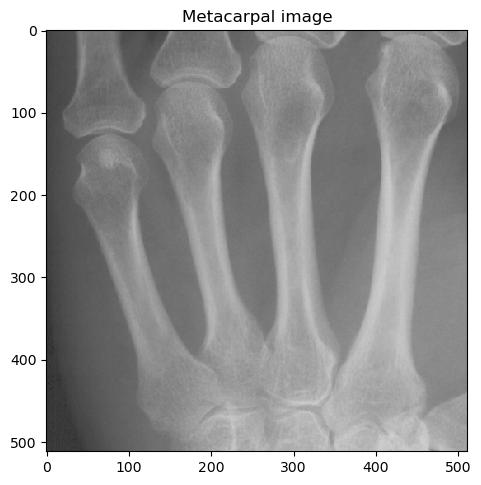

In [55]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

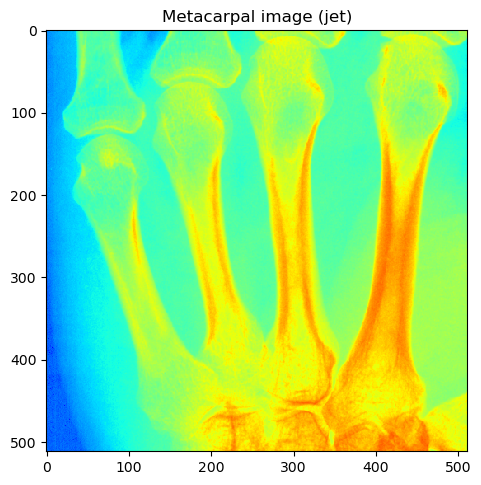

In [17]:
io.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (jet)')
io.show()

Grey scale level

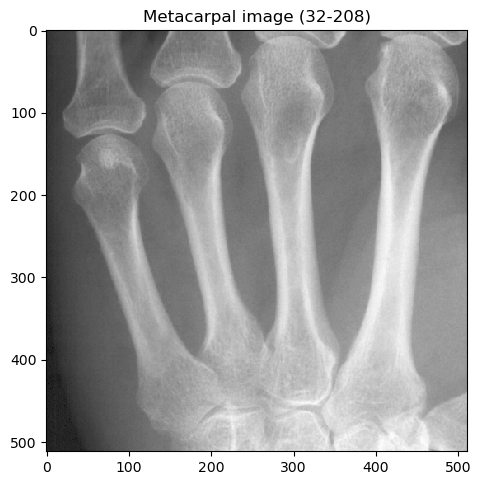

In [56]:
io.imshow(im_org, vmin=32, vmax=208)
plt.title('Metacarpal image (32-208)')
io.show()

### Histogram

There are 1147.0 pixel values in bin 100


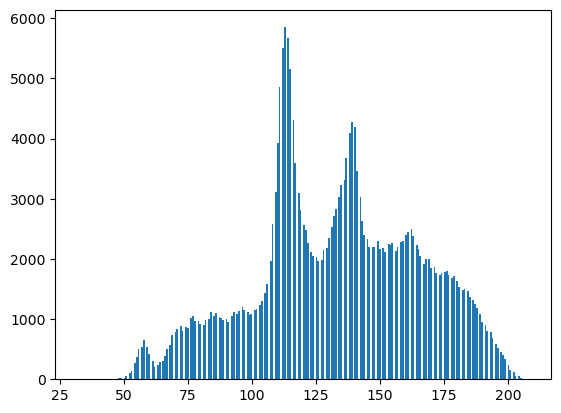

In [44]:
h = plt.hist(im_org.ravel(), bins=256)
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

**Exercise 9.** Use the histogram function to find the most common range of intensities?

In [37]:
print('Max intensity', max(h[1]))
print('Min intensity', min(h[1]))
print('Most frequent intensity:', np.argmax(h[0]))

Max intensity 208.0
Min intensity 32.0
Most frequent intensity: 117


### Pixel values and image coordinate systems

In [57]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


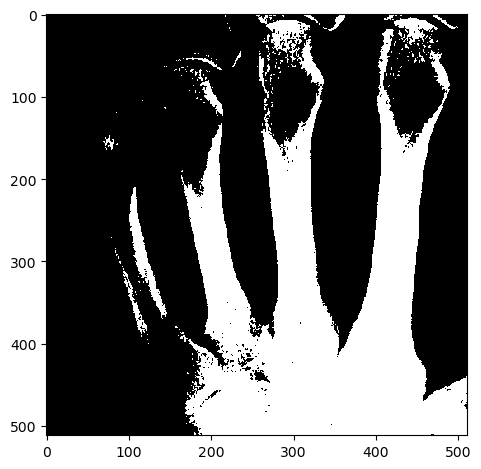

In [58]:
mask = im_org > 150
io.imshow(mask)
io.show()

**Exercise 13.** What happens?
All pixels with a value above 150 is chosen as a mask, and underneath we see the the image with the mask on top

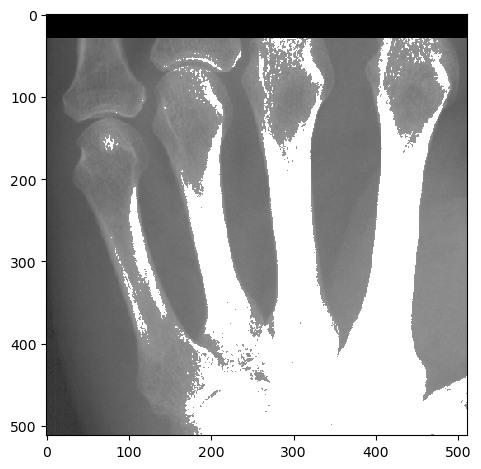

In [50]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

### Color images

image dim:  (600, 800, 3)
pixel type:  uint8


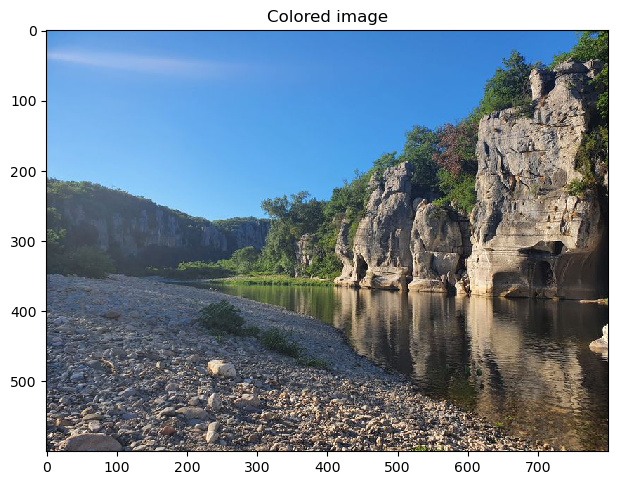

In [61]:
im_color = "ardeche.jpg"
im_color = io.imread(in_dir + im_color)
print('image dim: ', im_color.shape)
print('pixel type: ', im_color.dtype)
io.imshow(im_color)
plt.title('Colored image')
io.show()

**Exercise 15.** What are the (R, G, B) pixel values at (r, c) = (110, 90)?

In [62]:
r = 110
c = 90
im_val = im_color[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: [119 178 238]


**Exercise 16.** Try to use NumPy slicing to color the upper half of the photo green.

In [65]:
im_color.shape[0]

600

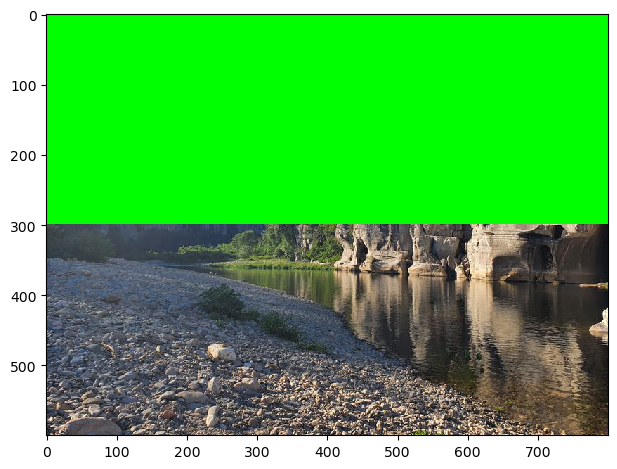

In [71]:
half_img = int(im_color.shape[0]/2)
im_color[:half_img:] = (0,255,0)
io.imshow(im_color)
io.show()

### Color channels

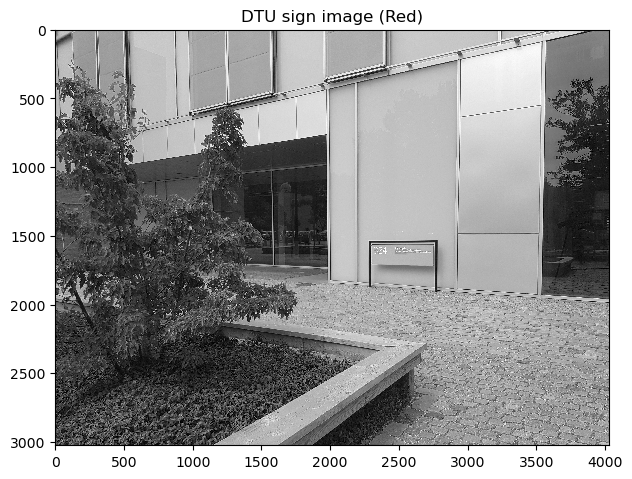

In [116]:
im_dtu = "DTUSign1.jpg"
im_dtu = io.imread(in_dir + im_dtu)
r_comp = im_dtu[:, :, 0] ## 0 red, 1 green, 2 blue
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

### Simple Image Manipulations

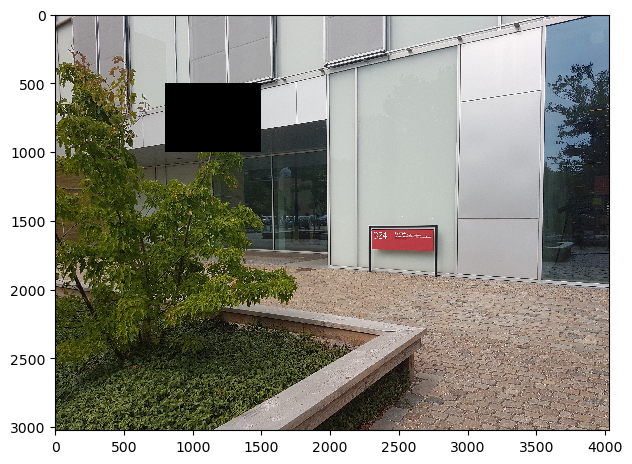

In [98]:
im_dtu[500:1000, 800:1500, :] = 0
io.imshow(im_dtu)
io.show()

**Exercise 25.** Show the image again and save it to disk as DTUSign1-marked.jpg using the io.imsave function. 

In [101]:
io.imsave(in_dir + 'DTUSign1-marked.png',im_dtu)

**Exercise 26.** Try to create a blue rectangle around the DTU Compute sign and save the resulting image.

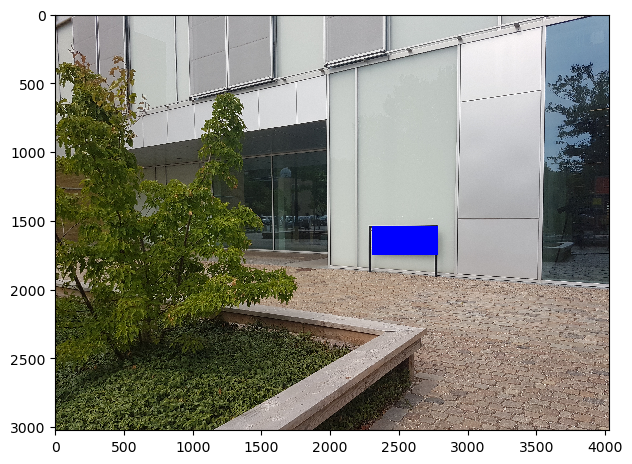

In [117]:
im_dtu[1540:1750, 2300:2770 :] = (0,0,255)
io.imshow(im_dtu)
io.show()

**Exercise 27.** Try to automatically create an image based on metacarpals.png where the bones are colored blue. 

In [229]:
im_meta = "metacarpals.png"
im_meta = io.imread(in_dir + im_meta)
mask = im_meta > 140

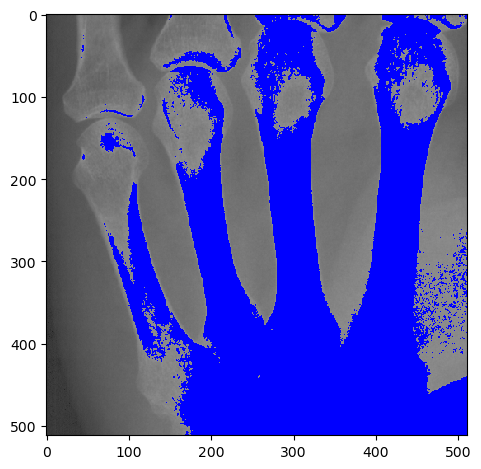

In [230]:
im_meta = color.gray2rgb(im_meta)
im_meta_byte = img_as_ubyte(im_meta)
im_meta_byte[mask] = (0,0,255)
io.imshow(im_meta)
io.show()

In [231]:
im_org = "metacarpals.png"
im_org = io.imread(in_dir + im_org)

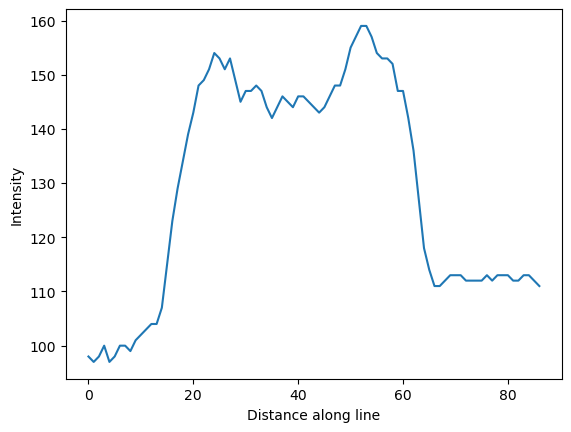

In [232]:
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

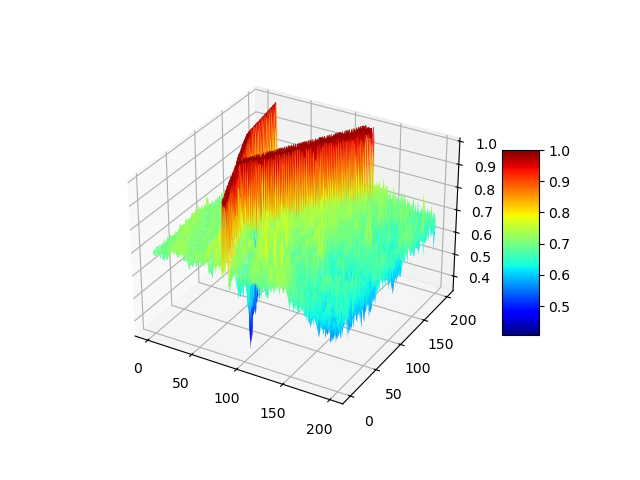

In [242]:
%matplotlib widget
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### DICOM images

In [263]:
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
#print(ds)

In [264]:
plt.imshow(ds.pixel_array) #, vmin=-1000, vmax=1000, cmap='gray')
plt.show()

AttributeError: 'LineCollection' object has no attribute 'do_3d_projection'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))